In [1]:
import os
import emoji
from collections import Counter
import pandas as pd
import seaborn as sns
import math
import numpy as np
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split


2024-07-31 17:29:41.895427: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X_train = pd.read_csv('./data/final/X_train.csv')
y_train = pd.read_csv('./data/final/y_train.csv')

In [168]:
non_empty_indices = X_train['selftext'].notna()

In [169]:
X_train = X_train[non_empty_indices].reset_index(drop=True)
y_train = y_train[non_empty_indices].reset_index(drop=True)

# Y_train

In [170]:
y_train.describe()

,score
count,25541.000000
mean,87.675385
std,918.853518
min,0.000000
25%,1.000000
50%,5.000000
75%,19.000000
max,85113.000000


In [171]:
y_train.shape

(25541, 1)

In [172]:
y_train.max()

score    85113
dtype: int64

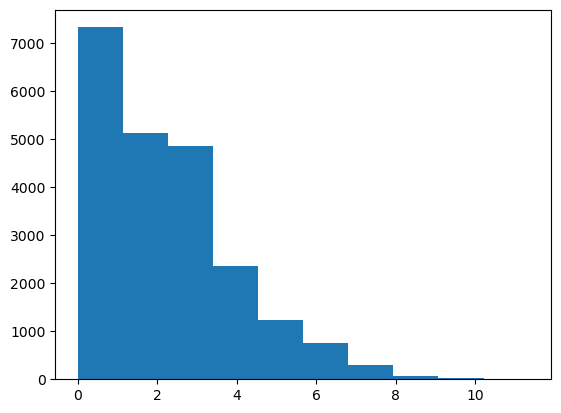

In [173]:
plt.hist(np.log(y_train[y_train>0]))
plt.show()

# X_train

In [174]:
X_train.describe()

,pinned,archived,locked,removed,deleted,is_self,is_video,is_original_content,upvote_ratio,gilded,total_awards_received,num_comments,num_crossposts,upvote_ratio_std,score_std,gilded_std,total_awards_received_std,num_comments_std,num_crossposts_std
count,25541.0,25541.0,25541.000000,25541.000000,25541.0,25541.0,25541.0,25541.000000,25541.000000,25541.000000,25541.000000,25541.000000,25541.000000,25541.000000,25541.000000,25541.000000,25541.000000,25541.000000,25541.000000
mean,0.0,0.0,0.001214,0.003015,0.0,1.0,0.0,0.002623,0.775425,0.024588,0.764183,70.806820,0.069183,-0.000575,-0.005629,0.000925,-0.000971,0.001913,-0.000537
std,0.0,0.0,0.034818,0.054825,0.0,0.0,0.0,0.051151,0.198320,0.711758,8.531210,1027.601767,0.473112,1.000854,0.763396,1.161353,0.945521,0.966448,0.901782
min,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,-3.762482,-0.078471,-0.039195,-0.085666,-0.064680,-0.132404
25%,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.670000,0.000000,0.000000,3.000000,0.000000,-0.532621,-0.077641,-0.039195,-0.085666,-0.061859,-0.132404
50%,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.810000,0.000000,0.000000,8.000000,0.000000,0.173911,-0.074317,-0.039195,-0.085666,-0.057156,-0.132404
75%,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.940000,0.000000,0.000000,21.000000,0.000000,0.829977,-0.062686,-0.039195,-0.085666,-0.044930,-0.132404
max,0.0,0.0,1.000000,1.000000,0.0,1.0,0.0,1.000000,1.000000,108.000000,472.000000,72564.000000,30.000000,1.132776,70.634554,176.180875,52.226464,68.180960,57.049460


In [175]:
X_train.head(3)

,id,author,created,retrieved,edited,pinned,archived,locked,removed,deleted,...,num_crossposts,selftext,thumbnail,shortlink,upvote_ratio_std,score_std,gilded_std,total_awards_received_std,num_comments_std,num_crossposts_std
0,opx7cl,elzolko,2021-07-23 07:16:18,2021-07-23 13:32:11,1970-01-01 00:00:00,0,0,0,0,0,...,0,i have seen lots of posts about the latest int...,self,https://redd.it/opx7cl,-0.381221,-0.075148,-0.039195,-0.085666,-0.062799,-0.132404
1,lg8kap,GelenkigeSemmel,2021-02-09 17:34:31,2021-02-10 21:34:56,1970-01-01 00:00:00,0,0,0,0,0,...,0,hey guys i though i d give a short overview ov...,self,https://redd.it/lg8kap,1.132776,-0.076810,-0.039195,-0.085666,-0.060918,-0.132404
2,kob22b,proonjooce,2021-01-01 13:10:14,2021-02-03 21:10:40,1970-01-01 00:00:00,0,0,0,0,0,...,0,so gbpusd has broken through a strong resistan...,self,https://redd.it/kob22b,1.132776,-0.075979,-0.039195,-0.085666,-0.061859,-0.132404


/tmp/ipykernel_154375/164624302.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(X_train[non_outlier_indices]['total_awards_received'])


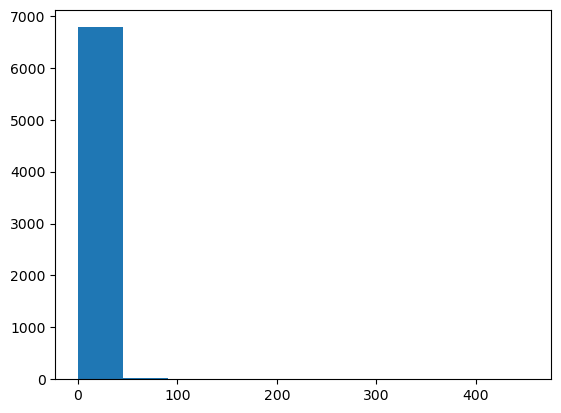

In [176]:
plt.hist(X_train[non_outlier_indices]['total_awards_received'])
plt.show()

In [177]:
## Review selftext

In [178]:
X_train['selftext'].iloc[:5]

0    i have seen lots of posts about the latest int...
1    hey guys i though i d give a short overview ov...
2    so gbpusd has broken through a strong resistan...
3    i m no expert just starting out and started to...
4    looking into this company as a possible invest...
Name: selftext, dtype: object

## Length of selftext

In [4]:
def get_length(df, column):
    return pd.Series([len(str(i)) if pd.notnull(i) else 0 for i in X_train['selftext']])

In [5]:
selftext_lengths = get_length(X_train, 'selftext')
selftext_lengths.name = 'selftext_length'

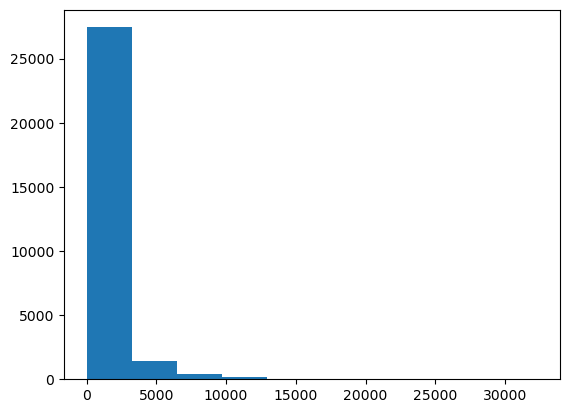

In [6]:
plt.hist(selftext_lengths)
plt.show()

## Average words per sample:

In [11]:
mean_words_per_sample = selftext_lengths.mean()

In [12]:
num_samples = selftext_lengths.shape[0]

In [13]:
num_samples / mean_words_per_sample

26.809077920636472

# Correlation of Selftext and score

In [196]:
corr_df = pd.concat(
    (selftext_lengths, y_train),
    axis=1)
corr_df.corr()

,selftext_length,score
selftext_length,1.000000,0.033162
score,0.033162,1.000000


In [210]:
X_train_numerics = X_train[['pinned','archived','locked','removed','deleted','upvote_ratio','total_awards_received','num_comments','num_crossposts']]

pd.concat(
    (X_train_numerics, y_train),
    axis=1
).corr()

,pinned,archived,locked,removed,deleted,upvote_ratio,total_awards_received,num_comments,num_crossposts,score
pinned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
archived,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
locked,NaN,NaN,1.000000,0.059617,NaN,0.001088,0.004127,0.000587,0.023425,0.018174
removed,NaN,NaN,0.059617,1.000000,NaN,0.028961,-0.004842,-0.003634,-0.008041,-0.004922
deleted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
upvote_ratio,NaN,NaN,0.001088,0.028961,NaN,1.000000,0.053679,0.035611,0.058599,0.070797
total_awards_received,NaN,NaN,0.004127,-0.004842,NaN,0.053679,1.000000,0.455145,0.370400,0.699954
num_comments,NaN,NaN,0.000587,-0.003634,NaN,0.035611,0.455145,1.000000,0.111957,0.266488
num_crossposts,NaN,NaN,0.023425,-0.008041,NaN,0.058599,0.370400,0.111957,1.000000,0.365605
score,NaN,NaN,0.018174,-0.004922,NaN,0.070797,0.699954,0.266488,0.365605,1.000000
